# Описание соревнований.

## <a href='https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description'>House Prices - Advanced Regression Techniques</a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from scipy import stats
from datetime import datetime 
from sklearn.model_selection import train_test_split, cross_val_score,  KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse, mean_squared_log_error as rmse
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA as KPCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 14})
TRAIN_PATH = './house-prices-advanced-regression-techniques/train.csv'
TEST_PATH = './house-prices-advanced-regression-techniques/test.csv'
SUBMIT_PATH = './house-prices-advanced-regression-techniques/sample_submission.csv'
df_train = pd.read_csv(TRAIN_PATH, sep=',')
test_df = pd.read_csv(TEST_PATH, sep=',')
sumbit_df = pd.read_csv(SUBMIT_PATH, sep=',')

## 2. Загрузка данных в Data Frame
#### Описание файлов
- train.csv - тренировочные данные
- test.csv - тестовые данные
- sampleSubmission.csv - образец файла для отправки в правильном формате
#### Описание признаков данных
- Id: identification number
- MSSubClass: Identifies the type of dwelling involved in the sale.	
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
 - 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [2]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 6)) + "\n" +
            "Train MAE:\t" + str(round(mae(train_true_values, train_pred_values), 6)) + "\n" +
            "Train MSE:\t" + str(round(mse(train_true_values, train_pred_values), 6))+ "\n" +
            "Train MSE:\t" + str(round(rmse(train_true_values, train_pred_values), 6)))

    print("\n" +
            "Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 6)) + "\n" +
            "Test MAE:\t" + str(round(mae(test_true_values, test_pred_values), 6)) + "\n" +
            "Test MSE:\t" + str(round(mse(test_true_values, test_pred_values), 6))+ "\n" +
            "Train RMSE:\t" + str(round(rmse(test_true_values, test_pred_values), 6)))
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()
    
def reduce_dims(df, dims=2, method='pca', perplexity=30):
    
    assert method in ['pca', 'tsne'], 'Неверно указан метод'
    
    if method=='pca':
        dim_reducer = PCA(n_components=dims, random_state=42)
        components = dim_reducer.fit_transform(df)
    elif method == 'tsne':
        dim_reducer = TSNE(n_components=dims, learning_rate=250, random_state=42, perplexity=perplexity)
        components = dim_reducer.fit_transform(df)
    else:
        print('Error')
        
    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return dim_reducer, pd.DataFrame(data = components, columns = colnames) 

def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                        c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                        alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        ax.scatter(components_with_labels_df['component_1'], 
                    components_with_labels_df['component_2'], 
                    components_with_labels_df['component_3'], 
                    c=components_with_labels_df.iloc[:, -1], 
                    cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        ax.scatter(components_with_labels_df['component_1'], 
                    components_with_labels_df['component_2'], 
                    components_with_labels_df['component_3'], 
                    alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    plt.title('3D mapping of objects')
    plt.show()

def display_clusters_distribution(unique_labels, labels_counts):
    """Визуализация распределения классов по кластерам"""
    plt.figure(figsize=(8,5))

    plt.bar(unique_labels, labels_counts)

    plt.xlabel('Clusters')
    plt.xticks(unique_labels)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    plt.show()

def apply_elbow_method(X):
    """Визуализация для метода 'локтя'"""
    
    distortions = []
    K = range(2,30)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=33).fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

## Исследование целевой переменной
### Построим график распределения целевой переменной "Price" - стоимости квартир

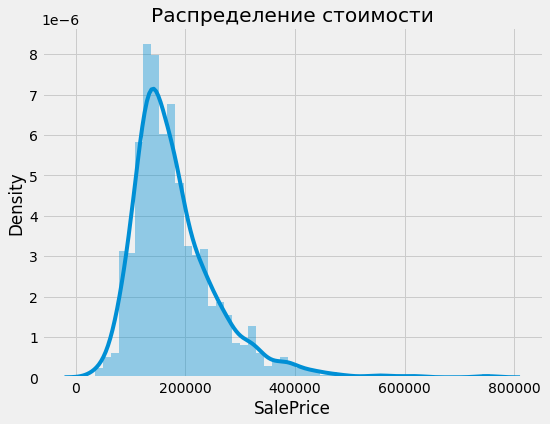

In [3]:
plt.figure(figsize = (8, 6))
sns.distplot(df_train['SalePrice'])
plt.title('Распределение стоимости')
plt.show()

### *Кросс-валидация*

### *Вывод: плотность распределения целевой переменной - нормальная. Большинство квартир встречаются в среднем ценовом диапазоне, по мере увеличения стоимости жилья распределение падает.*

## Обработка данных и создание новых фич

In [4]:
class DataPreprocessing():
    def __init__(self):
        self.MSZoning_list = {'FV':'MSZoning_FV', 'C (all)':'MSZoning_C (all)', 'RH':'MSZoning_RH', 'RL':'MSZoning_RL', 'RM':'MSZoning_RM'}
        self.medians = None
        self.mean_LotFrontage_Neighborhood = None
        self.mean_LotArea_Neighborhood = None
        self.MasVnrType_list = {'None':'MasVnrType_None', 'BrkFace':'MasVnrType_BrkFace', 'Stone':'MasVnrType_Stone', 'BrkCmn':'MasVnrType_BrkCmn'}
        self.Evaluation = {'Ex': 100, 'Gd': 75, 'TA': 50, 'Fa': 25, 'Po': 0, 'NA': 0}
        self.Evaluation_BsmtExposure = {'Gd': 100, 'Av': 75, 'Mn': 50, 'No': 25, 'NA': 0}
        self.Evaluation_BsmtFin = {'GLQ': 100, 'ALQ': 80, 'BLQ': 60, 'Rec': 50, 'LwQ': 30, 'Unf': 20, 'NA': 0}
        self.Evaluation_Functional = {'Typ': 150, 'Min1': 120, 'Min2': 100, 'Mod': 80, 'Maj1': 60, 'Maj2': 40, 'Sev': 20, 'Sal': 0}
        self.Evaluation_GarageFinish = {'Fin': 100, 'RFn': 60, 'Unf': 30, 'NA': 0}
        self.Evaluation_Fence = {'GdPrv': 100, 'MnPrv': 75, 'GdWo': 50, 'MnWw': 52, 'NA': 0}
        self.Evaluation_MiscFeature = {'Elev': 100, 'Gar2': 80, 'Othr': 60, 'Shed': 40, 'TenC': 20, 'NA': 0}
        self.MSSubClass_list = {20: 'MSSubClass_20', 30: 'MSSubClass_30', 40: 'MSSubClass_40', 45: 'MSSubClass_45', 50: 'MSSubClass_50', 60: 'MSSubClass_60',
                                70: 'MSSubClass_70', 75: 'MSSubClass_75', 80: 'MSSubClass_80', 85: 'MSSubClass_85', 90: 'MSSubClass_90', 120: 'MSSubClass_120',
                                150: 'MSSubClass_150', 160: 'MSSubClass_160', 180: 'MSSubClass_180', 190: 'MSSubClass_190'}
        self.HouseStyle_list = {'1Story':'HouseStyle_1Story', '1.5Fin':'HouseStyle_1.5Fin', '1.5Unf':'HouseStyle_1.5Unf', '2Story':'HouseStyle_2Story',
                                '2.5Fin':'HouseStyle_2.5Fin', '2.5Unf':'HouseStyle_2.5Unf', 'SFoyer':'HouseStyle_SFoyer', 'SLvl':'HouseStyle_SLvl'}
        self.Exterior1st_list = {'AsbShng':'Exterior1st_AsbShng', 'AsphShn':'Exterior1st_AsphShn', 'BrkComm':'Exterior1st_BrkComm', 'BrkFace':'Exterior1st_BrkFace',
                                'CBlock':'Exterior1st_CBlock', 'CemntBd':'Exterior1st_CemntBd', 'HdBoard':'Exterior1st_HdBoard', 'HdBoard':'Exterior1st_HdBoard',
                                'MetalSd':'Exterior1st_MetalSd', 'Other':'Exterior1st_Other', 'Plywood':'Exterior1st_Plywood', 'PreCast':'Exterior1st_PreCast',
                                'Stone':'Exterior1st_Stone', 'Stucco':'Exterior1st_Stucco', 'VinylSd':'Exterior1st_VinylSd', 'Wd Sdng':'Exterior1st_Wd Sdng', 'WdShing':'Exterior1st_WdShing'}
        self.Exterior2nd_list = {'AsbShng':'Exterior2nd_AsbShng', 'AsphShn':'Exterior2nd_AsphShn', 'BrkComm':'Exterior2nd_BrkComm', 'BrkFace':'Exterior2nd_BrkFace',
                                'CBlock':'Exterior2nd_CBlock', 'CemntBd':'Exterior2nd_CemntBd', 'HdBoard':'Exterior2nd_HdBoard', 'HdBoard':'Exterior2nd_HdBoard',
                                'MetalSd':'Exterior2nd_MetalSd', 'Other':'Exterior2nd_Other', 'Plywood':'Exterior2nd_Plywood', 'PreCast':'Exterior2nd_PreCast',
                                'Stone':'Exterior2nd_Stone', 'Stucco':'Exterior2nd_Stucco', 'VinylSd':'Exterior2nd_VinylSd', 'Wd Sdng':'Exterior2nd_Wd Sdng', 'WdShing':'Exterior2nd_WdShing'}
        self.scaler = RobustScaler()
        self.district_price_per_square = None

    def fit(self, df):
        df = df.copy()
        # Вычислите среднее значение
        self.medians = df.median()

        index_Neighborhood = 'Neighborhood'
        # Вычислите среднее значение 'LotFrontage' в каждом районе Neighborhood
        index = 'LotFrontage'
        self.mean_LotFrontage_Neighborhood = np.round_(df.groupby([index_Neighborhood])[index].agg('mean'), decimals = 0).to_dict()
        # Вычислите среднее значение 'LotArea' в каждом районе Neighborhood
        index = 'LotArea'
        self.mean_LotArea_Neighborhood = np.round_(df.groupby([index_Neighborhood])[index].agg('mean'), decimals = 0).to_dict()
        #вычислим среднюю стоимость квадратного фута в зависимости от района
        index_1 = 'Neighborhood'
        index_2 = 'SalePrice'
        index_3 = 'LotArea'
        self.district_price_per_square = (df.groupby([index_1])[index_2].agg('median') \
        / df.groupby([index_1])[index_3].agg('median')).to_dict()  

        
    def transform(self, df):
        df = df.copy()

        # удаление 'Id'
        index = 'Id'
        df.drop([index], axis=1, inplace=True)

        # Переведём 'MSSubClass' признак из категориального в бинарный
        index = 'MSSubClass'
        df[list(self.MSSubClass_list.values())] = 0
        for i in df[index].value_counts().index:
            if i in list(self.MSSubClass_list.keys()):
                df.loc[df[index] == i, self.MSSubClass_list[i]] = 1
            else:
                df.loc[df[index] == i, 'MSZoning_190'] = 1
        df.drop([index], axis=1, inplace=True)

        # Переведём 'MSZoning' признак из категориального в бинарный
        index = 'MSZoning'
        df[list(self.MSZoning_list.values())] = 0
        for i in df[index].value_counts().index:
            if i in list(self.MSZoning_list.keys()):
                df.loc[df[index] == i, self.MSZoning_list[i]] = 1
            else:
                df.loc[df[index] == i, 'MSZoning_C (all)'] = 1
        df.drop([index], axis=1, inplace=True)

        index_Neighborhood = 'Neighborhood'
        # Признак 'LotFrontage' заполним средними значениями по районам 'Neighborhood', если отсутствует то заполним средним по диапазону.  
        index = 'LotFrontage'
        q = 120 # 98%
        df.loc[df[index].isna(), index] = df[index_Neighborhood].map(self.mean_LotFrontage_Neighborhood)
        df[index].fillna(self.medians[index], inplace=True)       
        # Ограничим сверху квантилем 98%
        df[index].clip(upper=q, axis=0, inplace=True)

        # Признак 'LotArea' заполним средними значениями по районам 'Neighborhood', если отсутствует то заполним средним по диапазону.  
        index = 'LotArea'
        q = 25250 # 98%
        df.loc[df[index].isna(), index] = df[index_Neighborhood].map(self.mean_LotArea_Neighborhood)
        df[index].fillna(self.medians[index], inplace=True)       
        # Ограничим сверху квантилем 
        df[index].clip(upper=q, axis=0, inplace=True)

        #удаление 'Street' 
        index = 'Street'
        df.drop([index], axis=1, inplace=True)

        # Переведём 'Alley' признак из категориального в бинарный
        index = 'Alley'
        df[index].fillna('NA', inplace=True) 
        df = pd.get_dummies(df, columns=[index], prefix=index)

        # Переведём 'LotShape' признак из категориального в бинарный
        index = 'LotShape'
        df = pd.get_dummies(df, columns=[index], prefix=index)

        # Переведём 'LandContour' признак из категориального в бинарный
        index = 'LandContour'
        df = pd.get_dummies(df, columns=[index], prefix=index)

        #удаление 'Utilities'
        index = 'Utilities'
        df.drop([index], axis=1, inplace=True)

        # Переведём 'LotConfig' признак из категориального в бинарный
        index = 'LotConfig'
        df = pd.get_dummies(df, columns=[index], prefix=index)

        # Переведём 'LandSlope' признак из категориального в бинарный
        index = 'LandSlope'
        df = pd.get_dummies(df, columns=[index], prefix=index)

        # Переведём 'Condition1' признак из категориального в бинарный
        index = 'Condition1'
        df = pd.get_dummies(df, columns=[index], prefix=index)
        
        #удаление 'Condition2'
        index = 'Condition2'
        df.drop([index], axis=1, inplace=True)
        
        # Переведём 'BldgType' признак из категориального в бинарный
        index = 'BldgType'
        df = pd.get_dummies(df, columns=[index], prefix=index)
        
        # Переведём 'HouseStyle' признак из категориального в бинарный
        index = 'HouseStyle'
        df[index].fillna('SLvl', inplace=True) 
        df[list(self.HouseStyle_list.values())] = 0
        for i in df[index].value_counts().index:
            if i in list(self.HouseStyle_list.keys()):
                df.loc[df[index] == i, self.HouseStyle_list[i]] = 1
            else:
                df.loc[df[index] == i, 'HouseStyle_SLvl'] = 1
        df.drop([index], axis=1, inplace=True)

        # Переведём 'RoofStyle' признак из категориального в бинарный
        index = 'RoofStyle'
        df = pd.get_dummies(df, columns=[index], prefix=index)

        #удаление 'RoofMatl'
        index = 'RoofMatl'
        df.drop([index], axis=1, inplace=True)

        # Переведём 'Exterior1st' признак из категориального в бинарный
        index = 'Exterior1st'
        df[index].fillna('WdShing', inplace=True) 
        df[list(self.Exterior1st_list.values())] = 0
        for i in df[index].value_counts().index:
            if i in list(self.Exterior1st_list.keys()):
                df.loc[df[index] == i, self.Exterior1st_list[i]] = 1
            else:
                df.loc[df[index] == i, 'Exterior1st_WdShing'] = 1
        df.drop([index], axis=1, inplace=True)

        # Переведём 'Exterior2nd' признак из категориального в бинарный
        index = 'Exterior2nd'
        df[index].fillna('WdShing', inplace=True) 
        df[list(self.Exterior2nd_list.values())] = 0
        for i in df[index].value_counts().index:
            if i in list(self.Exterior2nd_list.keys()):
                df.loc[df[index] == i, self.Exterior2nd_list[i]] = 1
            else:
                df.loc[df[index] == i, 'Exterior2nd_WdShing'] = 1
        df.drop([index], axis=1, inplace=True)

        # Переведём 'MasVnrType' признак из категориального в бинарный
        index = 'MasVnrType'
        df[index].fillna('None', inplace=True) 
        df[list(self.MasVnrType_list.values())] = 0
        for i in df[index].value_counts().index:
            if i in list(self.MasVnrType_list.keys()):
                df.loc[df[index] == i, self.MasVnrType_list[i]] = 1
            else:
                df.loc[df[index] == i, 'MasVnrType_None'] = 1
        df.drop([index], axis=1, inplace=True)

        # Признак 'MasVnrArea'
        index = 'MasVnrArea'
        q = 650 # 98%
        df[index].fillna(0, inplace=True)       
        # Ограничим сверху квантилем 98%
        df[index].clip(upper=q, axis=0, inplace=True)
        
        # Переведём 'ExterQual' признак из категориального в бинарный
        index = 'ExterQual'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'ExterCond' признак из категориального в бинарный
        index = 'ExterCond'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'Foundation' признак из категориального в бинарный
        index = 'Foundation'
        df = pd.get_dummies(df, columns=[index], prefix=index)

        # Переведём 'BsmtQual' признак из категориального в бинарный
        index = 'BsmtQual'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'BsmtCond' признак из категориального в бинарный
        index = 'BsmtCond'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'BsmtExposure' признак из категориального в бинарный
        index = 'BsmtExposure'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation_BsmtExposure)

        # Переведём 'BsmtFinType1' признак из категориального в бинарный
        index = 'BsmtFinType1'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation_BsmtFin)

        # Переведём 'BsmtFinType2' признак из категориального в бинарный
        index = 'BsmtFinType2'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation_BsmtFin)

        # Признак 'TotalBsmtSF'
        index = 'TotalBsmtSF'
        q = 2000 # 98%
        df[index].fillna(0, inplace=True)       
        # Ограничим сверху квантилем 98%
        df[index].clip(upper=q, axis=0, inplace=True)

        #удаление 'Heating'
        index = 'Heating'
        df.drop([index], axis=1, inplace=True)

        # Переведём 'HeatingQC' признак из категориального в бинарный
        index = 'HeatingQC'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'CentralAir' признак из категориального в бинарный
        index = 'CentralAir'
        df[index].fillna('N', inplace=True) 
        df[index] = df[index].map({'Y': 1, 'N': 0})

        # удаление 'Electrical'
        index = 'Electrical'
        df.drop([index], axis=1, inplace=True)

        # Признак '1stFlrSF'
        index = '1stFlrSF'
        q = 2100 # 98%
        df[index].fillna(self.medians[index], inplace=True)       
        # Ограничим сверху квантилем 98%
        df[index].clip(upper=q, axis=0, inplace=True)

        # Признак '2ndFlrSF'
        index = '2ndFlrSF'
        q = 1500 # 98%
        df[index].fillna(self.medians[index], inplace=True)       
        # Ограничим сверху квантилем 98%
        df[index].clip(upper=q, axis=0, inplace=True)
        
        # Переведём 'KitchenQual' признак из категориального в бинарный
        index = 'KitchenQual'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'Functional' признак из категориального в бинарный
        index = 'Functional'
        df[index].fillna('Sal', inplace=True)
        df[index] = df[index].map(self.Evaluation_Functional)

        # Переведём 'FireplaceQu' признак из категориального в бинарный
        index = 'FireplaceQu'
        df[index].fillna('NA', inplace=True) 
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'GarageType' признак из категориального в бинарный
        index = 'GarageType'
        df[index].fillna('NA', inplace=True)
        df = pd.get_dummies(df, columns=[index], prefix=index)

        # Признак 'GarageYrBlt'
        index = 'GarageYrBlt'
        df[index].fillna(0, inplace=True) 

        # Переведём 'GarageFinish' признак из категориального в бинарный
        index = 'GarageFinish'
        df[index].fillna('NA', inplace=True)
        df[index] = df[index].map(self.Evaluation_GarageFinish)

        # Переведём 'GarageQual' признак из категориального в бинарный
        index = 'GarageQual'
        df[index].fillna('NA', inplace=True)
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'GarageCond' признак из категориального в бинарный
        index = 'GarageCond'
        df[index].fillna('NA', inplace=True)
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'PavedDrive' признак из категориального в бинарный
        index = 'PavedDrive'
        df[index].fillna('N', inplace=True) 
        df = pd.get_dummies(df, columns=[index], prefix=index)

        # Переведём 'PoolQC' признак из категориального в бинарный
        index = 'PoolQC'
        df[index].fillna('NA', inplace=True)
        df[index] = df[index].map(self.Evaluation)

        # Переведём 'Fence' признак из категориального в бинарный
        index = 'Fence'
        df[index].fillna('NA', inplace=True)
        df[index] = df[index].map(self.Evaluation_Fence)

        # Переведём 'MiscFeature' признак из категориального в бинарный
        index = 'MiscFeature'
        df[index].fillna('NA', inplace=True)
        df[index] = df[index].map(self.Evaluation_MiscFeature)

        # Переведём 'SaleType' признак из категориального в бинарный
        index = 'SaleType'
        df[index].fillna('Oth', inplace=True) 
        df = pd.get_dummies(df, columns=[index], prefix=index)

        # Переведём 'SaleCondition' признак из категориального в бинарный
        index = 'SaleCondition'
        df[index].fillna('Partial', inplace=True) 
        df = pd.get_dummies(df, columns=[index], prefix=index)

        # Признак 'BsmtFinSF1'
        index = 'BsmtFinSF1'
        df[index].fillna(0, inplace=True) 

        # Признак 'BsmtFinSF2'
        index = 'BsmtFinSF2'
        df[index].fillna(0, inplace=True) 

        # Признак 'BsmtUnfSF'
        index = 'BsmtUnfSF'
        df[index].fillna(0, inplace=True)

        # Признак 'BsmtFullBath'
        index = 'BsmtFullBath'
        df[index].fillna(0, inplace=True)

        # Признак 'BsmtHalfBath'
        index = 'BsmtHalfBath'
        df[index].fillna(0, inplace=True)

        # Признак 'GarageCars'
        index = 'GarageCars'
        df[index].fillna(0, inplace=True)

        # Признак 'GarageArea'
        index = 'GarageArea'
        df[index].fillna(0, inplace=True)

        #Заполним 'DistrictPrice' согласно средней стоимости квадратных футов в зависимости от района
        index_1 = 'Neighborhood'
        index_2 = 'DistrictPrice'
        df[index_2] = df[index_1].map(self.district_price_per_square)
        median_district_price_square = df[index_2].median()
        df[index_2].fillna(median_district_price_square, inplace=True)
        df[index_2] = np.round_(df[index_2], decimals = 0)

        # Переведём 'Neighborhood' признак из категориального в бинарный
        index = 'Neighborhood'
        df = pd.get_dummies(df, columns=[index], prefix=index)

        return df

    def fit_scale_merge(self, df):
        #Масштабирование
        df = pd.DataFrame(self.scaler.fit_transform(df), columns=df.columns)
        
        return df

    def scale_merge(self, df):
        #Масштабирование
        df = pd.DataFrame(self.scaler.transform(df), columns=df.columns)
        
        return df

In [5]:
def show_feature_importances(feature_names, feature_importances, get_top=20):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)

    plt.figure(figsize = (20, len(feature_importances[:get_top]) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'][:get_top])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

### *Разбиение на train и test*

In [6]:
df_train = pd.read_csv(TRAIN_PATH, sep=',')
test_df = pd.read_csv(TEST_PATH, sep=',')
sumbit_df = pd.read_csv(SUBMIT_PATH, sep=',')

extension_test_df = test_df.copy()
extension_test_df['SalePrice'] = sumbit_df['SalePrice']
df_train = pd.concat([df_train, extension_test_df], ignore_index=True)

preprocessor = DataPreprocessing()
preprocessor.fit(df_train)

df_train = preprocessor.transform(df_train)
test = preprocessor.transform(test_df)

y = df_train['SalePrice']
X = df_train.drop(columns=['SalePrice'])

X = preprocessor.fit_scale_merge(X)
test = preprocessor.scale_merge(test)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)
X_train.shape, X_valid.shape, test.shape, len(y_train), len(y_valid), len(sumbit_df['SalePrice'])

((1955, 214), (964, 214), (1459, 214), 1955, 964, 1459)

In [7]:
X_train = reduce_mem_usage(X_train)
X_valid = reduce_mem_usage(X_valid)
test_df = reduce_mem_usage(test)

Memory usage of dataframe is 3.21 MB
Memory usage after optimization is: 1.61 MB
Decreased by 49.8%
Memory usage of dataframe is 1.58 MB
Memory usage after optimization is: 0.79 MB
Decreased by 49.8%
Memory usage of dataframe is 2.38 MB
Memory usage after optimization is: 1.19 MB
Decreased by 50.0%


In [8]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test.isna().sum().sum()

(0, 0, 0)

In [9]:
XX = X_train.copy()
XX['SalePrice'] = y_train
train_df_corr = XX.corr()
train_df_corr = np.round(train_df_corr, 2)
train_df_corr[np.abs(train_df_corr) < 0.3] = 0
train_df_corr.to_csv('train_df_corr.csv', index=True)

In [10]:
corr = train_df_corr[train_df_corr['SalePrice'].abs() > 0]['SalePrice'].index.to_list()
corr.remove('SalePrice') 
len(corr)

21

In [11]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection

In [12]:
# 66   24
component=50
pca = PCA(n_components=component, whiten = False, random_state = 42)
X_pca_train = pca.fit_transform(X_train)
X_pca_valid = pca.transform(X_valid)

colnames = ['component_' + str(i) for i in range(1, component+1)]
X_train_trans = pd.DataFrame(data = X_pca_train, columns = colnames) 
X_valid_trans = pd.DataFrame(data = X_pca_valid, columns = colnames) 

In [13]:
# 64   30
component=50
pca = SparsePCA(n_components=component, alpha=0.0001, random_state=42, n_jobs=-1)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_valid = pca.transform(X_valid)

colnames = ['component_' + str(i) for i in range(1, component+1)]
X_train_trans = pd.DataFrame(data = X_pca_train, columns = colnames) 
X_valid_trans = pd.DataFrame(data = X_pca_valid, columns = colnames) 

In [14]:
# 66   37
component=50
pca = TruncatedSVD(n_components=component,algorithm='randomized', random_state=42, n_iter=5)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_valid = pca.transform(X_valid)

colnames = ['component_' + str(i) for i in range(1, component+1)]
X_train_trans = pd.DataFrame(data = X_pca_train, columns = colnames) 
X_valid_trans = pd.DataFrame(data = X_pca_valid, columns = colnames) 

In [15]:
# 66   32
component=50
pca = SparseRandomProjection(n_components=component,density = 'auto', eps = 0.5, random_state=42, dense_output = False)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_valid = pca.transform(X_valid)

colnames = ['component_' + str(i) for i in range(1, component+1)]
X_train_trans = pd.DataFrame(data = X_pca_train, columns = colnames) 
X_valid_trans = pd.DataFrame(data = X_pca_valid, columns = colnames) 

### *Построение модели*

In [38]:
import catboost as catb
submit = pd.read_csv(SUBMIT_PATH)

stack_clast = catb.CatBoostRegressor(silent=True, iterations=50, depth=2, learning_rate=1, loss_function='RMSE', random_strength=42)
stack_clast.fit(X_train_trans , y_train)
y_train_preds = stack_clast.predict(X_train_trans)
y_valid_preds = stack_clast.predict(X_valid_trans)
#y_test_preds = stack_clast.predict(test)


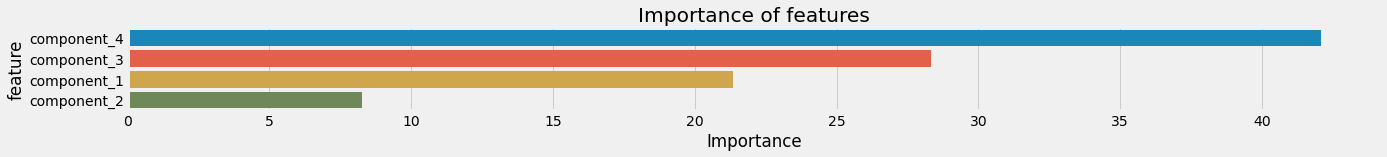

In [39]:
important_features_top = show_feature_importances(X_train_trans.columns, stack_clast.feature_importances_, get_top=50)
#important_features_top

Train R2:	0.344279
Train MAE:	29878.675208
Train MSE:	2012903841.02321
Train MSE:	0.052561

Test R2:	-0.084313
Test MAE:	40047.82364
Test MSE:	4054616030.43608
Train RMSE:	0.11138


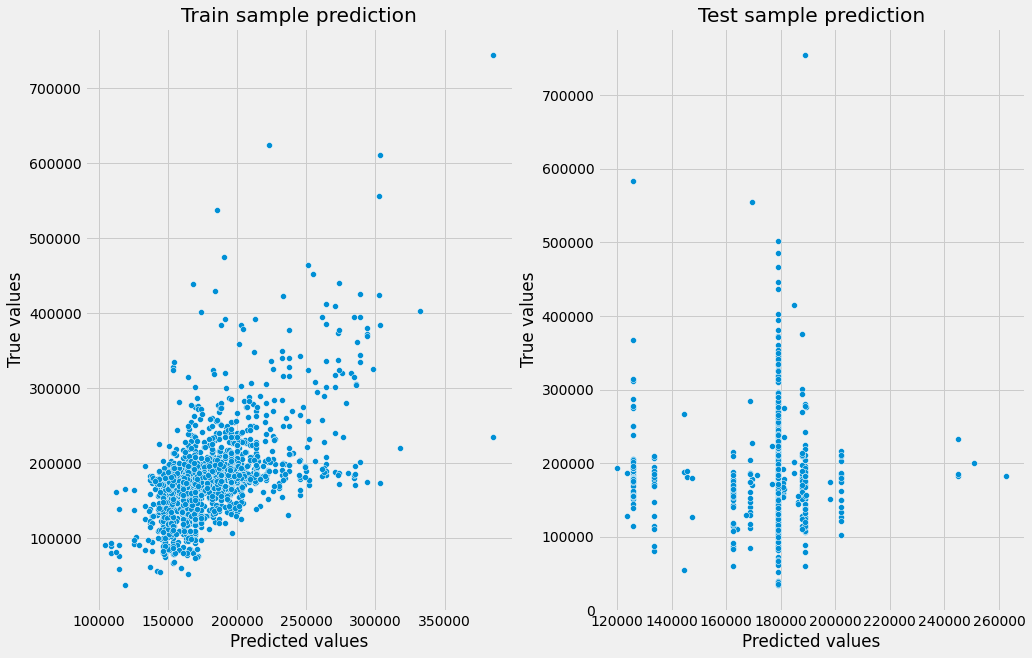

In [40]:
evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

In [20]:
evaluate_preds(y_train, y_train_preds, submit['SalePrice'], y_test_preds)

NameError: name 'y_test_preds' is not defined

In [ ]:
def show_feature_importances_1(feature_names, feature_importances, get_top=20):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [ ]:
features_top = show_feature_importances_1(X_train.columns, stack_clast.feature_importances_, get_top=214)
#len(features_top[25:50])

In [ ]:
start = 20
stop = 40
features_top_1 = features_top[start:stop]
final_clast = catb.CatBoostRegressor(silent=True, iterations=100, depth=2, learning_rate=1, loss_function='RMSE', random_strength=50)
final_clast.fit(X_train[features_top_1], y_train)
y_train_preds = final_clast.predict(X_train[features_top_1])
y_valid_preds = final_clast.predict(X_valid[features_top_1])
y_test_preds = final_clast.predict(test[features_top_1])

Train R2:	0.600666
Train MAE:	26505.898955
Train MSE:	1225856120.621334
Train MSE:	0.038803

Test R2:	0.325211
Test MAE:	34976.231076
Test MSE:	2523263336.825898
Train RMSE:	0.069938


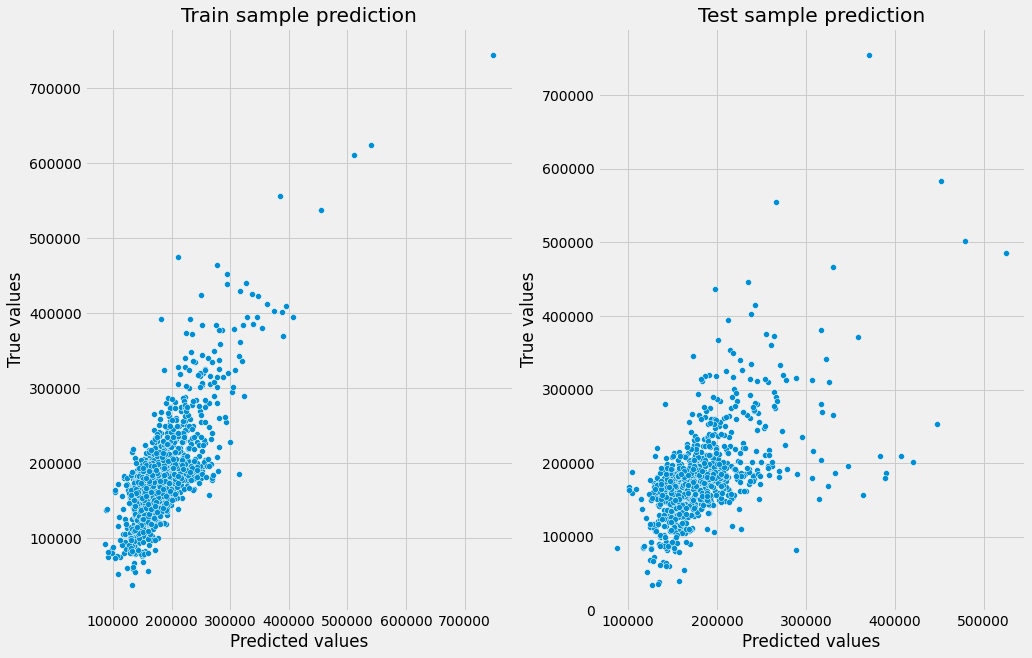

In [ ]:
evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

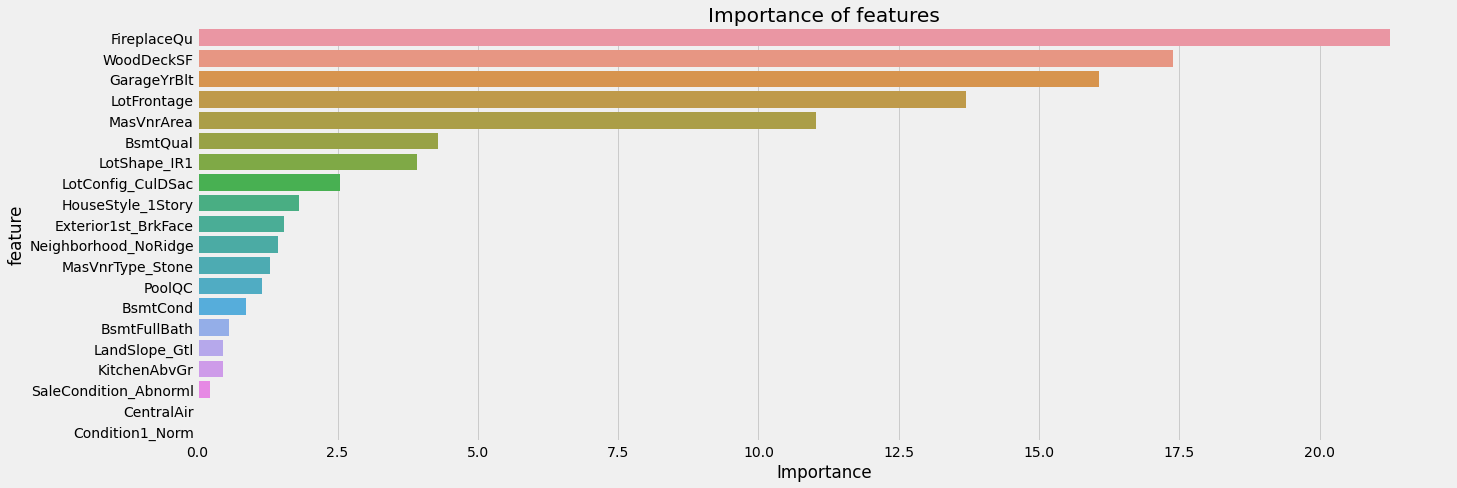

In [ ]:
important_features_top = show_feature_importances(features_top_1, final_clast.feature_importances_, get_top=30)

### *Оценка модели*

### *Кросс-валидация*

In [ ]:
cv_score = cross_val_score(stack_clast, X_train, y_train, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=42))
cv_score.mean()

0.2547109089075577

### Прогнозирование на тестовом датасете

In [ ]:
submit = pd.read_csv(SUBMIT_PATH)
y_test_preds = stack_clast.predict(test_df)
submit['Price'] = y_test_preds
submit.head(20)

,Id,SalePrice,Price
0,1461,169277.052498,149185.352701
1,1462,187758.393989,179237.454485
2,1463,183583.683570,184253.094518
3,1464,179317.477511,187461.467789
4,1465,150730.079977,143281.746876
5,1466,177150.989247,168337.091577
6,1467,172070.659229,176201.410455
7,1468,175110.956520,156685.916239
8,1469,162011.698832,163430.723151
9,1470,160726.247831,137380.116771


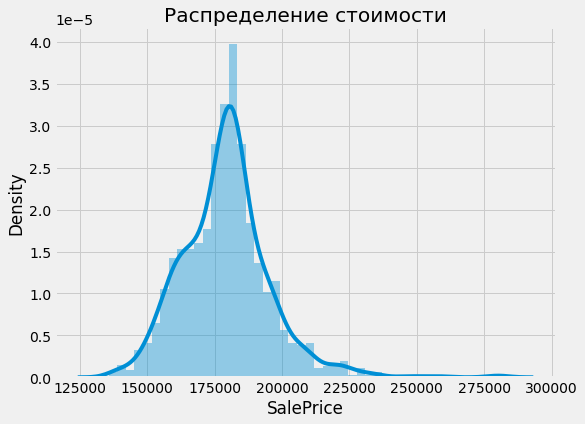

In [ ]:
submit = pd.read_csv(SUBMIT_PATH)
plt.figure(figsize = (8, 6))
sns.distplot(submit['SalePrice'])
plt.title('Распределение стоимости')
plt.show()